In [1]:
import pandas as pd 
import numpy as np
import os
import mglearn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

In [3]:
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [4]:
ram_prices.describe()

,Unnamed: 0,date,price
count,333.000000,333.000000,3.330000e+02
mean,166.000000,1996.878168,1.469755e+06
std,96.273049,11.026537,2.281991e+07
min,0.000000,1957.000000,3.700000e-03
25%,83.000000,1989.670000,1.260000e-01
50%,166.000000,1996.750000,8.000000e+00
75%,249.000000,2005.250000,1.330000e+02
max,332.000000,2015.920000,4.110418e+08


Text(0, 0.5, 'Price in $/Mbyte')

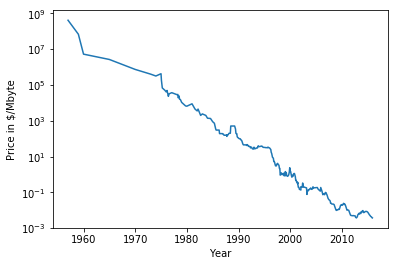

In [5]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [7]:
# use the data to forecast prices after the year 2000 

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [8]:
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
X_test = data_test.date[:, np.newaxis]

# we use a log transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
y_test = np.log(data_test.price)

In [9]:
tree = DecisionTreeRegressor()

In [10]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [11]:
linear_reg = LinearRegression()

In [12]:
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# predit on ALL data

X_all = ram_prices.date[:, np.newaxis]

In [14]:
X_all

array([[1957.  ],
       [1959.  ],
       [1960.  ],
       [1965.  ],
       [1970.  ],
       [1973.  ],
       [1974.  ],
       [1975.  ],
       [1975.08],
       [1975.25],
       [1975.75],
       [1976.  ],
       [1976.17],
       [1976.42],
       [1976.58],
       [1977.08],
       [1978.17],
       [1978.25],
       [1978.33],
       [1978.5 ],
       [1978.58],
       [1978.75],
       [1979.  ],
       [1979.75],
       [1980.  ],
       [1981.  ],
       [1981.58],
       [1982.  ],
       [1982.17],
       [1982.67],
       [1983.  ],
       [1983.67],
       [1984.  ],
       [1984.58],
       [1985.  ],
       [1985.33],
       [1985.42],
       [1985.5 ],
       [1985.58],
       [1985.67],
       [1985.83],
       [1985.92],
       [1986.  ],
       [1986.08],
       [1986.17],
       [1986.25],
       [1986.33],
       [1986.42],
       [1986.5 ],
       [1986.58],
       [1986.67],
       [1986.75],
       [1986.92],
       [1987.  ],
       [1987.08],
       [19

In [15]:
pred_tree = tree.predict(X_all)
pred_tree

array([19.83420545, 18.03424922, 15.47238152, 14.78720269, 13.50626839,
       12.89761854, 12.65897144, 12.95249515, 12.1019558 , 11.12112655,
       10.818177  , 10.61408165, 10.79875892, 10.04498711, 10.37349118,
       10.51325312, 10.23995979, 10.29010957,  9.86266556, 10.08580911,
        9.680344  ,  9.62905071,  9.26179365,  8.81045964,  8.77647579,
        9.082507  ,  8.40715509,  8.16621627,  8.4038005 ,  7.59085212,
        7.78155596,  7.59085212,  7.22911388,  7.19368582,  6.77992191,
        6.57925121,  6.30991828,  6.04025471,  5.85793315,  5.70378247,
        5.70378247,  5.70378247,  5.70378247,  5.70378247,  5.70378247,
        5.70378247,  5.24702407,  5.24702407,  5.24702407,  5.24702407,
        5.24702407,  5.24702407,  5.24702407,  5.170484  ,  5.170484  ,
        5.05624581,  5.0369526 ,  5.0369526 ,  5.0369526 ,  5.0369526 ,
        5.0369526 ,  5.0937502 ,  4.89034913,  5.0937502 ,  5.0937502 ,
        5.0937502 ,  5.20400669,  5.29330482,  5.29330482,  5.29

In [16]:
pred_lr = linear_reg.predict(X_all)
pred_lr

array([ 1.88534949e+01,  1.79958917e+01,  1.75670902e+01,  1.54230823e+01,
        1.32790745e+01,  1.19926698e+01,  1.15638683e+01,  1.11350667e+01,
        1.11007626e+01,  1.10278663e+01,  1.08134655e+01,  1.07062651e+01,
        1.06333689e+01,  1.05261685e+01,  1.04575602e+01,  1.02431594e+01,
        9.77576574e+00,  9.74146162e+00,  9.70715749e+00,  9.63426123e+00,
        9.59995710e+00,  9.52706084e+00,  9.41986044e+00,  9.09825927e+00,
        8.99105888e+00,  8.56225732e+00,  8.31355241e+00,  8.13345575e+00,
        8.06055949e+00,  7.84615870e+00,  7.70465419e+00,  7.41735714e+00,
        7.27585262e+00,  7.02714772e+00,  6.84705106e+00,  6.70554654e+00,
        6.66695440e+00,  6.63265028e+00,  6.59834615e+00,  6.55975401e+00,
        6.49114576e+00,  6.45255362e+00,  6.41824950e+00,  6.38394537e+00,
        6.34535323e+00,  6.31104910e+00,  6.27674498e+00,  6.23815284e+00,
        6.20384871e+00,  6.16954459e+00,  6.13095245e+00,  6.09664832e+00,
        6.02375206e+00,  

In [17]:
# undo log-transform

price_tree = np.exp(pred_tree)
price_tree

array([4.11041792e+08, 6.79477250e+07, 5.24288000e+06, 2.64241200e+06,
       7.34003000e+05, 3.99360000e+05, 3.14573000e+05, 4.21888000e+05,
       1.80224000e+05, 6.75840000e+04, 4.99200000e+04, 4.07040000e+04,
       4.89600000e+04, 2.30400000e+04, 3.20000000e+04, 3.68000000e+04,
       2.80000000e+04, 2.94400000e+04, 1.92000000e+04, 2.40000000e+04,
       1.60000000e+04, 1.52000000e+04, 1.05280000e+04, 6.70400000e+03,
       6.48000000e+03, 8.80000000e+03, 4.47900000e+03, 3.52000000e+03,
       4.46400000e+03, 1.98000000e+03, 2.39600000e+03, 1.98000000e+03,
       1.37900000e+03, 1.33100000e+03, 8.80000000e+02, 7.20000000e+02,
       5.50000000e+02, 4.20000000e+02, 3.50000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 3.00000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.90000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.76000000e+02, 1.76000000e+02, 1.57000000e+02,
      

In [18]:
price_lr = np.exp(pred_lr)
price_lr

array([1.54158963e+08, 6.53907734e+07, 4.25883016e+07, 4.99067806e+06,
       5.84828851e+05, 1.61566133e+05, 1.05226270e+05, 6.85327287e+04,
       6.62216400e+04, 6.15660776e+04, 4.96853564e+04, 4.46346230e+04,
       4.14966870e+04, 3.72783676e+04, 3.48065278e+04, 2.80897339e+04,
       1.76019636e+04, 1.70083830e+04, 1.64348193e+04, 1.52794066e+04,
       1.47641482e+04, 1.37261882e+04, 1.23308613e+04, 8.93971753e+03,
       8.03095622e+03, 5.23047469e+03, 4.07877676e+03, 3.40655145e+03,
       3.16706157e+03, 2.55589748e+03, 2.21865001e+03, 1.66462831e+03,
       1.44498269e+03, 1.12681204e+03, 9.41101559e+02, 8.16924389e+02,
       7.85998122e+02, 7.59492371e+02, 7.33880459e+02, 7.06097982e+02,
       6.59278306e+02, 6.34320039e+02, 6.12929239e+02, 5.92259789e+02,
       5.69838638e+02, 5.50622306e+02, 5.32053996e+02, 5.11912053e+02,
       4.94649145e+02, 4.77968384e+02, 4.59873958e+02, 4.44365900e+02,
       4.13125763e+02, 3.99194167e+02, 3.85732378e+02, 3.71129725e+02,
      

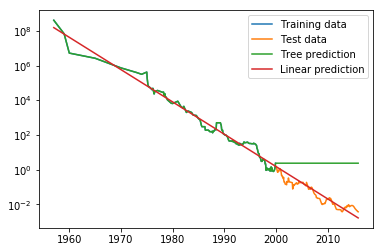

In [19]:
plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear prediction')
plt.legend()